<a href="https://colab.research.google.com/github/Jinestroz/Proyecto_investigacion_semiario/blob/main/Copia_Practica_Jose_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from pandas import datetime 
from datetime import timedelta
from statsmodels.tsa.stattools import  adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from time import time 
%matplotlib inline




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [2]:
# @title Dataframe desde archivo CVS
# df1 = pd.read_csv("lista_personas - Hoja 1.csv")
# df1

# Tratamiento de los datos como CSV
### En construcción...


In [3]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1bqg_wBX8s9GcW6UeCQ1sx4H2xmCvVHB6/export?format=csv")

df2 = pd.read_csv("https://docs.google.com/spreadsheets/d/1FBkNtj49IXmu7p750dE0n6V7ZArY0SQs/export?format=csv")

In [4]:
#@title datos muestra
df

,Departamento,Poblacion_Hombres,Poblacion_Mujeres,Poblacion_Total,Ocupados_Hombres,Ocupados_Mujeres,Ocupados_Total,Desocupados_Hombres,Desocupados_Mujeres,Desocupados_Total,Inactivos_Hombres,Inactivos_Mujeres,Inactivos_Total
0,ATLANTIDA,210887,225363,436250,91427,32543,123970,2742,977,3719,90812,166663,257475
1,COLON,151723,158202,309925,67751,18401,86152,1549,347,1896,62082,119503,181585
2,COMAYAGUA,240839,252628,493467,117055,32245,149300,1979,477,2456,90231,189094,279325
3,COPAN,183615,187441,371056,95661,23423,119084,1336,316,1652,62784,141119,203903
4,CORTES,750811,811586,1562397,339512,168442,507954,11651,4407,16058,309483,551686,861169
5,CHOLUTECA,216407,221211,437618,99759,24192,123951,2406,609,3015,90038,173420,263458
6,EL PARAISO,223591,220915,444506,117668,23670,141338,1643,466,2109,78265,171853,250118
7,FRANCISCO MORAZAN,719526,789383,1508909,336106,184065,520171,11948,5001,16949,291134,523332,814466
8,GRACIAS A DIOS,44274,46521,90795,14321,7894,22215,819,510,1329,23092,31869,54961
9,INTIBUCA,113744,118807,232551,59713,13802,73515,473,123,596,38880,90523,129403


In [5]:
#@title Estadística básica
datos = df.describe()
datos

,Poblacion_Hombres,Poblacion_Mujeres,Poblacion_Total,Ocupados_Hombres,Ocupados_Mujeres,Ocupados_Total,Desocupados_Hombres,Desocupados_Mujeres,Desocupados_Total,Inactivos_Hombres,Inactivos_Mujeres,Inactivos_Total
count,18.000000,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,225129.111111,236191.888889,4.613210e+05,106700.333333,36419.722222,143120.055556,2567.166667,870.166667,3437.333333,88413.888889,172401.722222,260815.611111
std,199847.550474,218832.972509,4.186110e+05,91330.169777,51712.264575,141813.208457,3460.067192,1419.978593,4872.243088,82605.244524,145290.075728,227715.846771
min,30606.000000,31951.000000,6.255700e+04,13463.000000,6941.000000,20404.000000,385.000000,101.000000,486.000000,12583.000000,20824.000000,33407.000000
25%,101041.250000,106292.500000,2.073338e+05,51054.250000,10551.250000,63390.750000,674.250000,219.000000,823.250000,36286.500000,80743.750000,117030.250000
50%,197251.000000,197322.000000,3.961950e+05,93544.000000,21374.500000,121517.500000,1596.000000,406.500000,1932.000000,70524.500000,152171.500000,223412.500000
75%,236527.000000,245811.750000,4.812268e+05,117514.750000,30668.500000,147278.750000,2299.250000,584.250000,2875.250000,90666.750000,185175.500000,275358.250000
max,750811.000000,811586.000000,1.562397e+06,339512.000000,184065.000000,520171.000000,11948.000000,5001.000000,16949.000000,309483.000000,551686.000000,861169.000000


In [6]:
columna = "Ocupados_Hombres"
media = df[columna].sum()/df[columna].count()
media

106700.33333333333

In [7]:
columna = "Ocupados_Mujeres"
media = df[columna].sum()/df[columna].count()
media

36419.72222222222

In [8]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

2674158307.5065355

In [9]:
columna = "Ocupados_Mujeres"
media = df[columna].sum()/df[columna].count()
media

36419.72222222222

In [10]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza

2674158307.5065355

In [11]:
poblacion_activa = df["Ocupados_Total"].sum() + df["Desocupados_Total"].sum()
poblacion_activa

2638033

In [12]:
PET = poblacion_activa + df["Inactivos_Total"].sum()
PET

7332714

In [13]:
tasa_actividad = (poblacion_activa/PET)*100
tasa_actividad 

35.97621562766528

In [14]:
poblacion_ocupada = df["Ocupados_Total"].sum()
poblacion_ocupada

2576161

In [15]:
poblacion_desempleada = df["Desocupados_Total"].sum()
poblacion_desempleada 

61872

In [16]:
tasa_desempleo = (poblacion_desempleada/poblacion_activa)*100
tasa_desempleo


2.3453838522869126

In [17]:
tasa_ocupacion = (poblacion_ocupada/poblacion_activa)*100
tasa_ocupacion

97.65461614771309

In [18]:
tasa_ocupacion + tasa_desempleo

100.0

In [19]:
poblacion_ocupada = df["Ocupados_Hombres"].sum
poblacion_ocupada 

<bound method Series.sum of 0      91427
1      67751
2     117055
3      95661
4     339512
5      99759
6     117668
7     336106
8      14321
9      59713
10     13463
11     48168
12     83156
13     41242
14    123320
15    107163
16     39652
17    125469
Name: Ocupados_Hombres, dtype: int64>

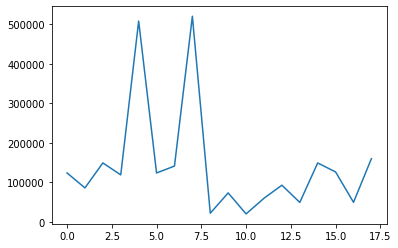

In [20]:
df["Ocupados_Total"].plot()

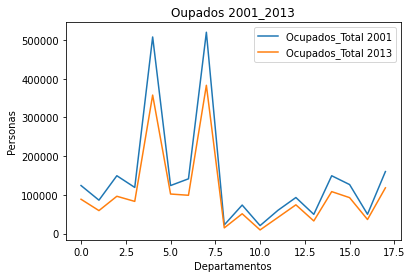

In [21]:


fig, ax = plt.subplots()  
ax.plot(df["Ocupados_Total"], label='Ocupados_Total 2001')
ax.plot(df2["Ocupados_Total"], label='Ocupados_Total 2013')
ax.set_xlabel('Departamentos')
ax.set_ylabel('Personas')
ax.set_title("Oupados 2001_2013")
ax.legend()

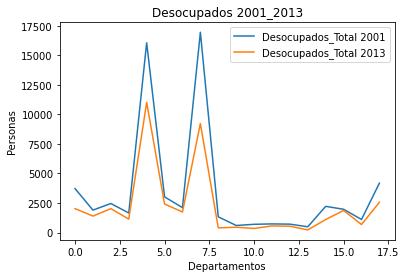

In [22]:
fig, ax = plt.subplots()  
ax.plot(df["Desocupados_Total"], label='Desocupados_Total 2001')
ax.plot(df2["Desocupados_Total"], label='Desocupados_Total 2013')
ax.set_xlabel('Departamentos')
ax.set_ylabel('Personas')
ax.set_title("Desocupados 2001_2013")
ax.legend()

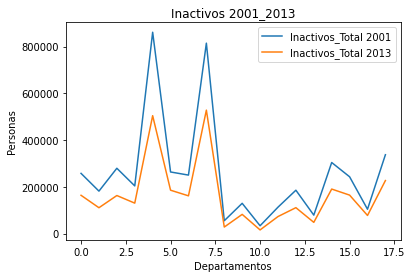

In [23]:
fig, ax = plt.subplots()  
ax.plot(df["Inactivos_Total"], label='Inactivos_Total 2001')
ax.plot(df2["Inactivos_Total"], label='Inactivos_Total 2013')
ax.set_xlabel('Departamentos')
ax.set_ylabel('Personas')
ax.set_title("Inactivos 2001_2013")
ax.legend()

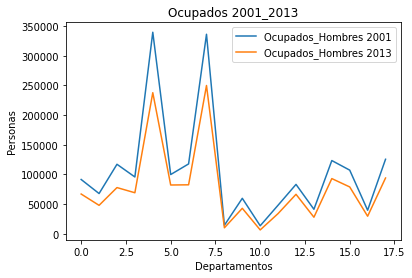

In [24]:
fig, ax = plt.subplots()  
ax.plot(df["Ocupados_Hombres"], label='Ocupados_Hombres 2001')
ax.plot(df2["Ocupados_Hombres"], label='Ocupados_Hombres 2013')
ax.set_xlabel('Departamentos')
ax.set_ylabel('Personas')
ax.set_title("Ocupados 2001_2013")
ax.legend()

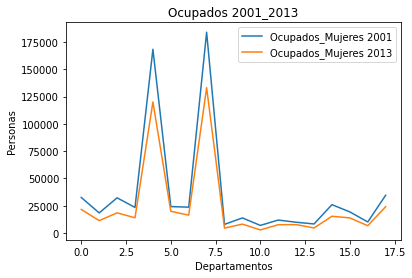

In [25]:
fig, ax = plt.subplots()  
ax.plot(df["Ocupados_Mujeres"], label='Ocupados_Mujeres 2001')
ax.plot(df2["Ocupados_Mujeres"], label='Ocupados_Mujeres 2013')
ax.set_xlabel('Departamentos')
ax.set_ylabel('Personas')
ax.set_title("Ocupados 2001_2013")
ax.legend()

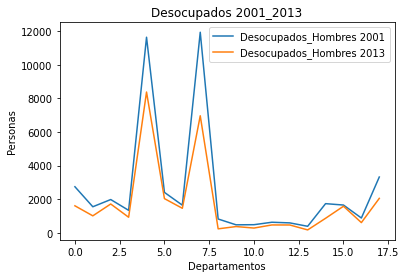

In [26]:
fig, ax = plt.subplots()  
ax.plot(df["Desocupados_Hombres"], label='Desocupados_Hombres 2001')
ax.plot(df2["Desocupados_Hombres"], label='Desocupados_Hombres 2013')
ax.set_xlabel('Departamentos')
ax.set_ylabel('Personas')
ax.set_title("Desocupados 2001_2013")
ax.legend()

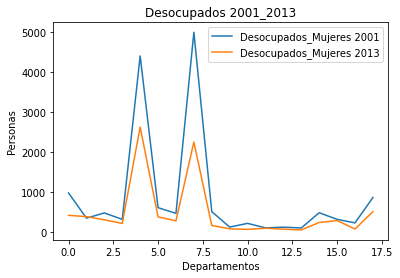

In [27]:
fig, ax = plt.subplots()  
ax.plot(df["Desocupados_Mujeres"], label='Desocupados_Mujeres 2001')
ax.plot(df2["Desocupados_Mujeres"], label='Desocupados_Mujeres 2013')
ax.set_xlabel('Departamentos')
ax.set_ylabel('Personas')
ax.set_title("Desocupados 2001_2013")
ax.legend()

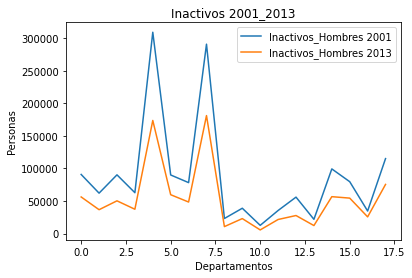

In [28]:
fig, ax = plt.subplots()  
ax.plot(df["Inactivos_Hombres"], label='Inactivos_Hombres 2001')
ax.plot(df2["Inactivos_Hombres"], label='Inactivos_Hombres 2013')
ax.set_xlabel('Departamentos')
ax.set_ylabel('Personas')
ax.set_title("Inactivos 2001_2013")
ax.legend()

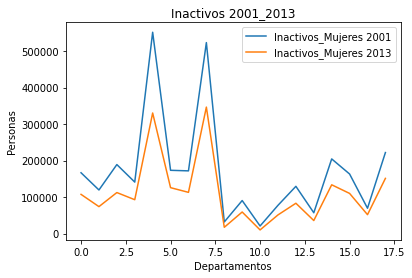

In [29]:
fig, ax = plt.subplots()  
ax.plot(df["Inactivos_Mujeres"], label='Inactivos_Mujeres 2001')
ax.plot(df2["Inactivos_Mujeres"], label='Inactivos_Mujeres 2013')
ax.set_xlabel('Departamentos')
ax.set_ylabel('Personas')
ax.set_title("Inactivos 2001_2013")
ax.legend()

In [30]:
ar_coefs=[1,-0.05]
ma_coefs=[1,0.2]




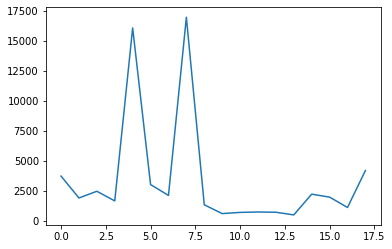

In [31]:
df["Desocupados_Total"].plot()

In [32]:
df.head


<bound method NDFrame.head of          Departamento  Poblacion_Hombres  ...  Inactivos_Mujeres  Inactivos_Total
0           ATLANTIDA             210887  ...             166663           257475
1               COLON             151723  ...             119503           181585
2           COMAYAGUA             240839  ...             189094           279325
3               COPAN             183615  ...             141119           203903
4              CORTES             750811  ...             551686           861169
5           CHOLUTECA             216407  ...             173420           263458
6         EL PARAISO              223591  ...             171853           250118
7   FRANCISCO MORAZAN             719526  ...             523332           814466
8     GRACIAS A DIOS               44274  ...              31869            54961
9            INTIBUCA             113744  ...              90523           129403
10  ISLAS DE LA BAHIA              30606  ...              20824    

[]

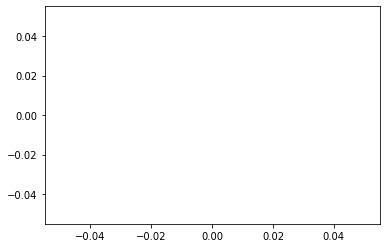

In [33]:
plt.plot()

In [34]:
X = df["Ocupados_Hombres"].values # con los Datos Año 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza la prueba de Dickey nos dice que cuando mas negativo es el numero mas fuerte es el rechazo de H0 de que existe una raiz unitaria 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria. la serie tiene una raiz unitaria la H0 es cierta

ADF Statistic: -2.255201
p-value: 0.186824
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
failed to Reject Ho - Time series is Non-Stationary


In [35]:
X = df["Ocupados_Mujeres"].values # con los datos año 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -4.293251
p-value: 0.000456
Critical Values:
	1%: -3.889
	5%: -3.054
	10%: -2.667
Rejet Ho - Time series is Stationary


In [36]:
X = df["Desocupados_Hombres"].values #con los datos año 2013 
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -4.130528
p-value: 0.000862
Critical Values:
	1%: -3.889
	5%: -3.054
	10%: -2.667
Rejet Ho - Time series is Stationary


In [37]:
X = df2["Desocupados_Hombres"].values con los datos año 2001
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -1.564522
p-value: 0.501386
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
failed to Reject Ho - Time series is Non-Stationary


In [38]:
df["Ocupados_Hombres_shifted"] = df["Ocupados_Hombres"].shift()
df

,Departamento,Poblacion_Hombres,Poblacion_Mujeres,Poblacion_Total,Ocupados_Hombres,Ocupados_Mujeres,Ocupados_Total,Desocupados_Hombres,Desocupados_Mujeres,Desocupados_Total,Inactivos_Hombres,Inactivos_Mujeres,Inactivos_Total,Ocupados_Hombres_shifted
0,ATLANTIDA,210887,225363,436250,91427,32543,123970,2742,977,3719,90812,166663,257475,NaN
1,COLON,151723,158202,309925,67751,18401,86152,1549,347,1896,62082,119503,181585,91427.0
2,COMAYAGUA,240839,252628,493467,117055,32245,149300,1979,477,2456,90231,189094,279325,67751.0
3,COPAN,183615,187441,371056,95661,23423,119084,1336,316,1652,62784,141119,203903,117055.0
4,CORTES,750811,811586,1562397,339512,168442,507954,11651,4407,16058,309483,551686,861169,95661.0
5,CHOLUTECA,216407,221211,437618,99759,24192,123951,2406,609,3015,90038,173420,263458,339512.0
6,EL PARAISO,223591,220915,444506,117668,23670,141338,1643,466,2109,78265,171853,250118,99759.0
7,FRANCISCO MORAZAN,719526,789383,1508909,336106,184065,520171,11948,5001,16949,291134,523332,814466,117668.0
8,GRACIAS A DIOS,44274,46521,90795,14321,7894,22215,819,510,1329,23092,31869,54961,336106.0
9,INTIBUCA,113744,118807,232551,59713,13802,73515,473,123,596,38880,90523,129403,14321.0


In [45]:
#Fit the AR Model (Ajuste el Modelo AR)
#create the model (Crear el Modelo)
model = ARMA(train_data, order=(1,0))

NameError: ignored

In [ ]:
#fit the model (Encajar en el Modelo)
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:' , end - start)

In [48]:
#summary of the model  (Resumen del Modelo)
print(model_fit.summary())

NameError: ignored

In [53]:
ar18 = np.array([32543,18401,32245,23423,168442,24192,23670,184065,7894,13802,6941,11848,9842,8277,25939,19326,10119,34586])
ma = np.array([1])
simulated_AR18_data = ArmaProcess(ar18 ,ma).generate_sample(nsample=18)

plt.figure(figsize=[10, 7.5]); # set dimensions for figure
plt.plot(simulated_AR18_data)
plt.title("simulated AR18 Process")
plt.show() 

NameError: ignored